In [1]:
#1
# See paper
#dm/dr = 4*pi*r^2p

In [3]:
#b
#dP/dr = -Gmp/r^2

In [4]:
#c
# See paper
#dL/dr = 4*pi*r^2pe

In [5]:
#d
# dT/dr = -3/4ac kp/T^3 L/4*pi*r^2

In [159]:
#e
# M(0) = 0
# T(0) = 15.6E6 K
# P(0) = 2.3E16 N/m^2
# L(0) = 0
# M(R) = M_sun
# L(R) = L_sun
# T(R) = 0
# P(R) = 0

#f
'''Not all boundary conditions are at R= 0. I can use the ones at r=R as a check to see how accurate my code is. They should be
around the values for the sun'''

'Not all boundary conditions are at R= 0. I can use the ones at r=R as a check to see how accurate my code is. They should be\naround the values for the sun'

In [160]:
#g
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#define constants
X = 0.7
Y = 0.28
Z = 0.02

u = (2.0*X +0.75*Y + 0.5*Z) ** (-1.0)
m_H = 1.67E-27
k_B = 1.38E-23
G = 6.67E-11
pi = np.pi
M_sun = 2.0E30
L_sun = 3.8E26
R_sun = 6.96E8
sigma = 5.67E-8
c = 3.0E8
a = 7.565E-16

# define functions
def p(y, r):
    M, P, L, T = y
    p0 = (P-((4.0*sigma*(T**4))/(3.0*c)))*(u*m_H/(k_B*T))
    return p0
def k(y, r):
    M, L, T, P = y
    p0 = p(y, r)
    t = 10.0
    g_bf = 1.0
    g_ff = 1.9
    k_bf = 4.3E21*(g_bf/t)*Z*(1.0+X)*(p0/np.power(T, 3.5)) 
    k_ff = 3.7E18*g_ff*(1.0-Z)*(1.0+X)*(p0/np.power(T, 3.5))    
    k_e = 0.02*(1.0+X)                                       
    k_bar = ((k_bf+k_ff+k_e)/3.0)
    return 0.03
def e(y, r):
    M, P, L, T = y
    e_ipp = 1.08E-12
    e_icno = 8.24E-31
    p0 = p(y, r)
    X_H = 0.64
    X_CNO = 0.015
    e_pp = e_ipp*p0*X_H*X_H*((T/(10E5)) ** 4)
    e_cno = e_icno*p0*X_H*X_CNO*((T/(10E5)) ** 19.9)
    e0 = e_pp + e_cno
    return e0

In [161]:
def dmdr(y, r):
    M, P, L, T = y
    p0 = p(y, r)
    e0 = e(y, r)
    dmdr0 = 4.0*pi*r*r*p0
    return dmdr0
def dpdr(y, r):
    M, P, L, T = y
    p0 = p(y, r)
    e0 = e(y, r)
    dpdr0 = (-G*M*p0)/(r*r)
    return dpdr0
def dldr(y, r):
    M, P, L, T = y
    p0 = p(y, r)
    e0 = e(y, r)
    dldr0 = 4.0*pi*r*r*p0*e0
    return dldr0
def dtdr(y, r):
    M, P, L, T = y
    p0 = p(y, r)
    e0 = e(y, r)
    k_bar = k(y, r)
    dtdr0 = -(3.0/(4.0*a*c))*(k_bar*p0/(np.power(T, 3.0)))*(L/(4.0*pi*r*r))
    return dtdr0

def f(y, r):
    M, P, L, T = y
    derivs = [dmdr(y, r), dpdr(y, r), dldr(y, r), dtdr(y, r)]
    return derivs

#initial vals
M0 = 0
L0 = 0
T0 = 15.6E6 
P0 = 2.3E16

#initial conditions
y0 = [M0, P0, L0, T0]

#r array
#r=np.logspace(np.log10(0.01*R_sun), np.log10(R_sun), num = 100)
r = np.linspace(0.01*R_sun, R_sun, 100)

#ODE solver
psoln = odeint(f, y0, r)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in double_scalars


110063.598294
109402.131618
107875.077061
105681.195928
102899.08103
99596.8927514
95846.7260633
91726.4363111
87318.2161269
82705.9554375
77972.165543
73194.9442479
68445.3343839
63785.3172324
59266.5652124
54929.9650509
50805.8284433
46914.6467742
43268.2187275
39870.9827509
36721.4104496
33813.350189
31137.2495123
28681.2123798
26431.8787374
24375.1285921
22496.6258023
20782.2221435
19218.2447698
17791.689579
16490.3405254
15302.8328648
14218.6747142
13228.238836
12322.7339432
11494.1626441
10735.2714162
10039.4965394
9400.90882804
8814.1590388
8274.4254516
7777.36421949
7319.06308277
6895.99867753
6504.99739809
6143.19978827
5808.02829079
5497.15814753
5208.49122265
4940.13250989
4690.36909657
4457.65128299
4240.5758416
4037.8708638
3848.38248081
3671.06273066
3504.95901248
3349.20438482
3203.00918275
3065.65325332
2936.47927984
2814.88655745
2700.32566146
2592.29344793
2490.32878042
2394.00850527
2302.9440133
2216.77799116
2135.18164365
2057.85206382
1984.50997968
1914.89761849
18

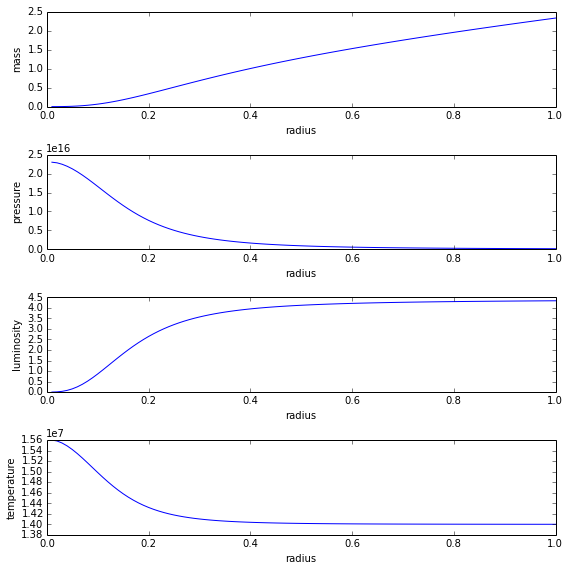

'My results are different from the figures but not hugely so. My mass is about twice as large as m_sun, which is 2 * 10 ^ 30. \nMy pressure results have the same dependence as on the graph, as does my temperature. The pressure also decreases slightly\nmore quickly than the temperature, matching the other graphs. The luminosity increases to slightly too high, but is still less\nthan one order of magnitude off from where it should be. My kappa function did not work properly for some reason, so this\ncould be a major source of error in these calculations. Another source of error could have been the estimations for the various\nconstants in the kappa function, which were difficult to find online.'

In [162]:


'''
#p array
p_r = [p(psoln[i], r) for i in range(100)]
p_rad = np.array(p_r)
'''
'''
for i in range(0,100):
    print k(psoln[i],r)
'''
for i in range(0, 100):
    print p(psoln[i],r)
    P = [p(psoln[i], r)]

#plot
fig = plt.figure(1, figsize=(8,8))
'''
trying to plot p(r) causes weird errors!
#plot p(r)
ax1 = fig.add_subplot(111)
ax1.plot(r, P)
ax1.set_xlabel("radius")
ax1.set_ylabel("p(r)")
'''
#plot M(r)
ax1 = fig.add_subplot(411)
ax1.plot(r/R_sun, psoln[:,0]/M_sun)
ax1.set_xlabel("radius")
ax1.set_ylabel("mass")

#plot P
ax2 = fig.add_subplot(412)
ax2.plot(r/R_sun, psoln[:,1])
ax2.set_xlabel("radius")
ax2.set_ylabel("pressure")

#plot L(r)
ax3 = fig.add_subplot(413)
ax3.plot(r/R_sun, psoln[:,2]/L_sun)
ax3.set_xlabel("radius")
ax3.set_ylabel("luminosity")

#plot T
ax4 = fig.add_subplot(414)
ax4.plot(r/R_sun, psoln[:,3])
ax4.set_xlabel("radius")
ax4.set_ylabel("temperature")

plt.tight_layout()
plt.show()

#i 
'''My results are different from the figures but not hugely so. My mass is about twice as large as m_sun, which is 2 * 10 ^ 30. 
My pressure results have the same dependence as on the graph, as does my temperature. The pressure also decreases slightly
more quickly than the temperature, matching the other graphs. The luminosity increases to slightly too high, but is still less
than one order of magnitude off from where it should be. My kappa function did not work properly for some reason, so this
could be a major source of error in these calculations. Another source of error could have been the estimations for the various
constants in the kappa function, which were difficult to find online.'''